<a href="https://colab.research.google.com/github/InfinityFirst/Sharable/blob/main/HMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install hmmlearn

## Import Libraries

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from hmmlearn.hmm import MultinomialHMM
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [3]:
raw_file = 'traffic_accident1.csv'

columns_of_interest =  ['Collision Type',
'Weather',
'Light',
'Traffic Control',
'Driver At Fault',
'Injury Severity',
'Vehicle Going Dir',
'Speed Limit']

hidden_variable = 'Injury Severity'

observable_variable = ['Collision Type',
'Weather',
'Light',
'Traffic Control',
'Driver At Fault',
'Vehicle Going Dir',
'Speed Limit']

### Load Clean the Data

In [4]:
# Load the CSV file
df = pd.read_csv(raw_file)

# Columns to clean
columns_to_clean = columns_of_interest

# Clean the data: Convert to uppercase and strip whitespace
for col in columns_to_clean:
    df[col] = df[col].astype(str).str.upper().str.strip()


<ipython-input-4-3c65f15ebf2e>:2: DtypeWarning: Columns (1,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(raw_file)


In [5]:
print(df.head())

  Report Number Local Case Number                Agency Name  \
0   MCP2967004Y         230070277   Montgomery County Police   
1   MCP3348000Z         230051804   Montgomery County Police   
2   MCP3372001V         230065250   Montgomery County Police   
3   MCP3005007M         230060937   Montgomery County Police   
4    DD5635004J         230067899  Rockville Police Departme   

        ACRS Report Type Crash Date/Time        Route Type        Road Name  \
0  Property Damage Crash   12/6/23 18:42  Maryland (State)  CONNECTICUT AVE   
1           Injury Crash   8/28/23 11:09  Maryland (State)       NORBECK RD   
2  Property Damage Crash  11/10/23 20:24  Maryland (State)      GEORGIA AVE   
3  Property Damage Crash  10/16/23 19:33  Maryland (State)      GEORGIA AVE   
4  Property Damage Crash  11/22/23 23:29  Maryland (State)       NORBECK RD   

  Cross-Street Name  Off-Road Description Municipality  ... Vehicle Going Dir  \
0      BALTIMORE ST                   NaN   KENSINGTON  ...

### Encode Categorical Variables

In [6]:
# Use LabelEncoder to convert categorical variables to numerical form
encoders = {}
for col in columns_to_clean:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders[col] = encoder


### Prepare Data for HMM

In [7]:
# Define observables and hidden variables
X = df[observable_variable].to_numpy()

y = df[hidden_variable].to_numpy()

# Flatten the observable data for HMM
X = X.flatten()

# Define sequence lengths (all data as a single sequence)
lengths = [len(df)]


# Optimize HMM Parameters

In [ ]:
import numpy as np
from hmmlearn.hmm import MultinomialHMM

bic_scores = []
for n in range(2, 10):  # Try different numbers of states
    model = MultinomialHMM(n_components=n, n_iter=200, random_state=42)
    model.fit(X.reshape(-1, 1), lengths=lengths)
    bic = -2 * model.score(X.reshape(-1, 1)) + n * np.log(X.size)
    bic_scores.append((n, bic))

best_n = min(bic_scores, key=lambda x: x[1])[0]
print(f"Optimal number of hidden states: {best_n}")


In [26]:
# Single sequence (entire dataset treated as one sequence)
lengths = [X.shape[0]]

# HMM Model
model = MultinomialHMM(n_components=3, n_iter=100)  # Adjust components as needed

# Reshape data and fit the model
X_reshaped = X.reshape(-1, 1)
model.fit(X_reshaped, lengths=lengths)

# Predict the hidden states
hidden_states = model.predict(X_reshaped, lengths=lengths)
print("Hidden States:", hidden_states)


https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Hidden States: [0 1 2 ... 2 2 2]


### Evaluate the Model

In [27]:
# Compare predicted hidden states with the actual labels (optional, for evaluation purposes)
accuracy = accuracy_score(y, hidden_states[:len(y)])
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 79.36%


### Visualize Insights



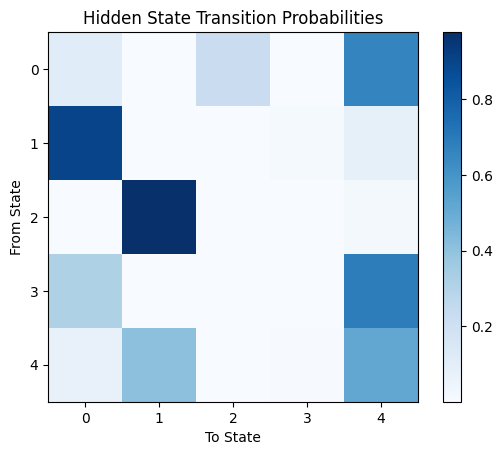

In [10]:
plt.imshow(model.transmat_, cmap='Blues', interpolation='none')
plt.colorbar()
plt.title("Hidden State Transition Probabilities")
plt.xlabel("To State")
plt.ylabel("From State")
plt.show()



### Emission Probabilities

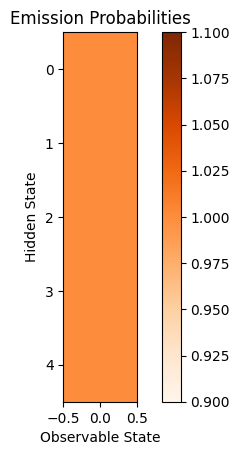

In [11]:
plt.imshow(model.emissionprob_, cmap='Oranges', interpolation='none')
plt.colorbar()
plt.title("Emission Probabilities")
plt.xlabel("Observable State")
plt.ylabel("Hidden State")
plt.show()


### Correlation Heatmap

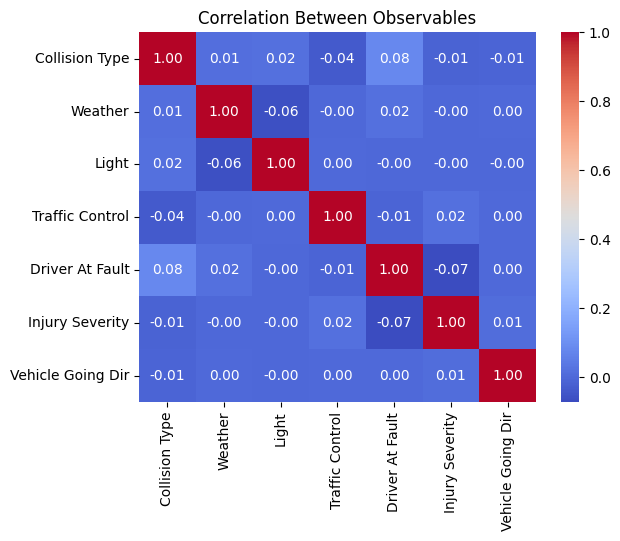

In [12]:
# Correlation heatmap of observable variables
corr_matrix = df[columns_to_clean[:-1]].corr()  # Exclude 'Injury Severity'
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Observables")
plt.show()


### Save result

In [13]:
# Save hidden states to the original DataFrame
df['Predicted Hidden State'] = hidden_states[:len(df)]

# Save to CSV
df.to_csv('hmm_results.csv', index=False)
print("Results saved to hmm_results.csv")


Results saved to hmm_results.csv
